# DESAFIO ONCASE QUESTÃO 1 EDA

---

NOME: ÍCARO JOSIAS FERREIRA PAIVA

EMAIL: ijfp@cin.ufpe.br

Análise descritiva dos dados (EDA)



1. Construa uma análise descritiva extraindo conhecimento das variáveis e apresentando quais insights podem ser obtidos a partir delas;

2. Mostre-nos um caminho para selecionar graficamente as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê.

3. Em cada problema descreva quais outras técnicas poderiam ser aplicadas e porquê você não as escolheu.

4. Utilize os dados: eda_receitas_data.zip

## IMPORTAÇÃO

### IMPORTAR BIBLIOTECAS

In [1]:
import json

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns

### IMPORTAR DADOS

In [2]:
df_raw = pd.DataFrame(json.load(open('/content/drive/MyDrive/DESAFIO/ONCASE/receitas.json')))

In [3]:
df_raw.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01T04:00:00.000Z,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20T04:00:00.000Z,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20T04:00:00.000Z,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27T04:00:00.000Z,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20T04:00:00.000Z,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


## EXPLORAÇÃO DOS DADOS

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   directions   20111 non-null  object 
 1   fat          15908 non-null  float64
 2   date         20111 non-null  object 
 3   categories   20111 non-null  object 
 4   calories     15976 non-null  float64
 5   desc         13495 non-null  object 
 6   protein      15929 non-null  float64
 7   rating       20100 non-null  float64
 8   title        20111 non-null  object 
 9   ingredients  20111 non-null  object 
 10  sodium       15974 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.7+ MB


### LIMPEZA DOS DADOS

Formatação Variável 'date'

In [5]:
# formatando datas
df_raw['date'] = pd.to_datetime(df_raw['date'], format='%Y%m%d %H:%M:%S')


Tratamento de dados faltantes

In [6]:
# identificação das variáveis, tipo, numeros faltantes e porcentagem 

data_info = []
for j in range(df_raw.shape[1]):
    # data_info[j][0] = df1.T.index[j]
    data_info.append((df_raw.columns[j],df_raw.dtypes[j],df_raw.isna().sum()[j],(df_raw.isna().sum()/len(df_raw))[j]*100))
data_info = pd.DataFrame(data_info, columns=('variables', 'type', 'num_nan', 'perc_nan'))

data_info

,variables,type,num_nan,perc_nan
0,directions,object,19,0.094386
1,fat,float64,4222,20.973671
2,date,"datetime64[ns, UTC]",19,0.094386
3,categories,object,19,0.094386
4,calories,float64,4154,20.635867
5,desc,object,6635,32.960755
6,protein,float64,4201,20.869349
7,rating,float64,30,0.149031
8,title,object,19,0.094386
9,ingredients,object,19,0.094386


In [7]:
# separação das variáveis categoricas e numéricas

object_list = []
float_list = []
for j in range(df_raw.shape[1]):
    if data_info.type[j] == 'object':
        object_list.append(data_info.variables[j])
    if data_info.type[j] == 'float':
        float_list.append(data_info.variables[j])

float_list,object_list

(['fat', 'calories', 'protein', 'rating', 'sodium'],
 ['directions', 'categories', 'desc', 'title', 'ingredients'])

Para as variáveis categóricas será preenchida os valores faltantes por um sting sem valor

In [8]:
# preenchimento da variáveis categóricas

for i in object_list:
    df_raw[i] = df_raw[i].fillna('')

Para as variáveis numéricas serão excluidas as amostras com dados faltantes.

In [9]:
# eliminaçao de amostras com dados faltantes

df_raw = df_raw.dropna()

In [10]:
# veificação dos NAs

df_raw.isna().sum()

directions     0
fat            0
date           0
categories     0
calories       0
desc           0
protein        0
rating         0
title          0
ingredients    0
sodium         0
dtype: int64

### ANALISE DAS VARIÁVEIS

Primeiras analises das variáveis numéricas

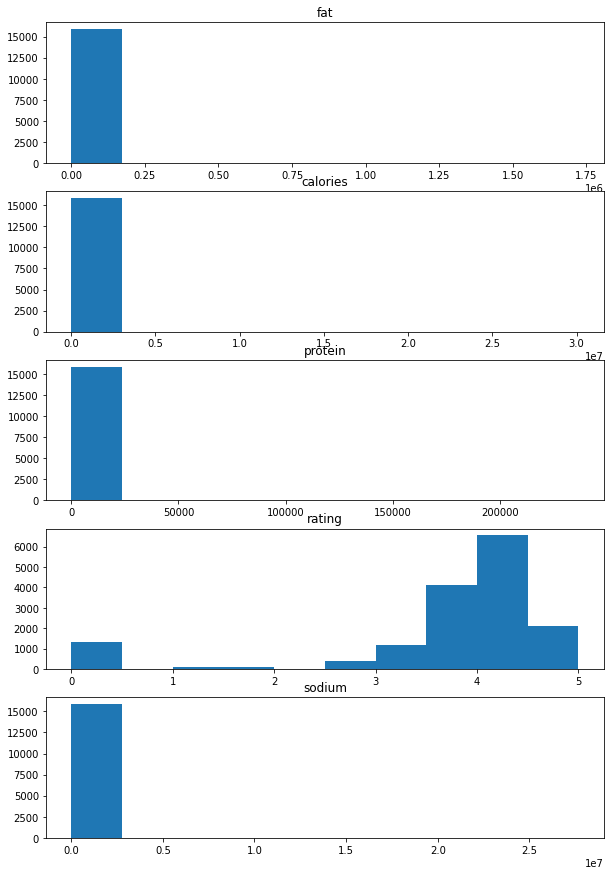

In [11]:
# histograma das variáveis

fig, axs = plt.subplots(len(float_list), figsize=(10,15))
for i in range(len(float_list)):
    axs[i].set_title('%s'%(float_list[i]))
    axs[i].hist(df_raw[float_list[i]])

A visualização dos dados ficou comprometida pela presença de poucos dados com valores extremos. O boxplot permite identificar com mais precisão essa distribuição

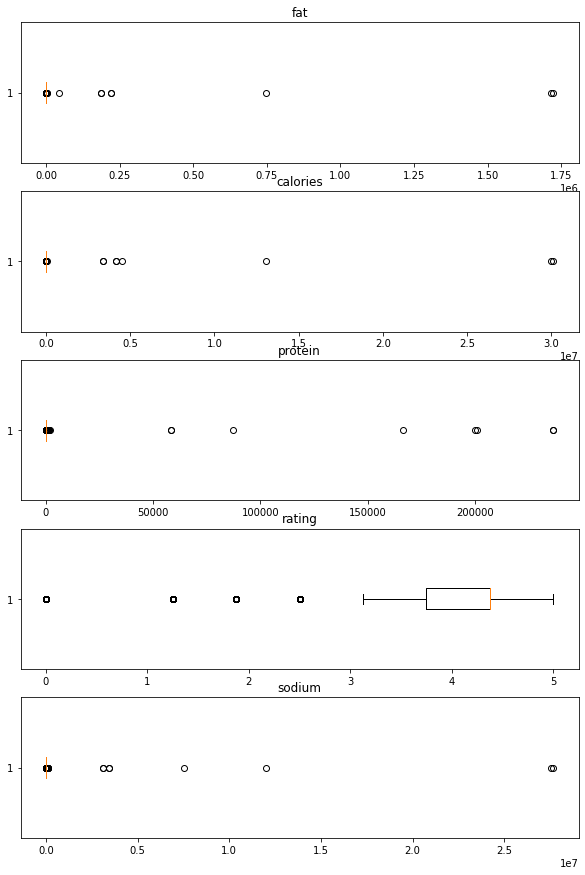

In [12]:
# boxplot das variáveis

fig, axs = plt.subplots(len(float_list), figsize=(10,15))
for i in range(len(float_list)):
    axs[i].set_title('%s'%(float_list[i]))
    axs[i].boxplot(df_raw[float_list[i]], vert=False)

O boxplot sugere que haja quantidades de dados extremos (outliers) nas variáveis 'fat', 'calories', 'protein', 'sodium'.

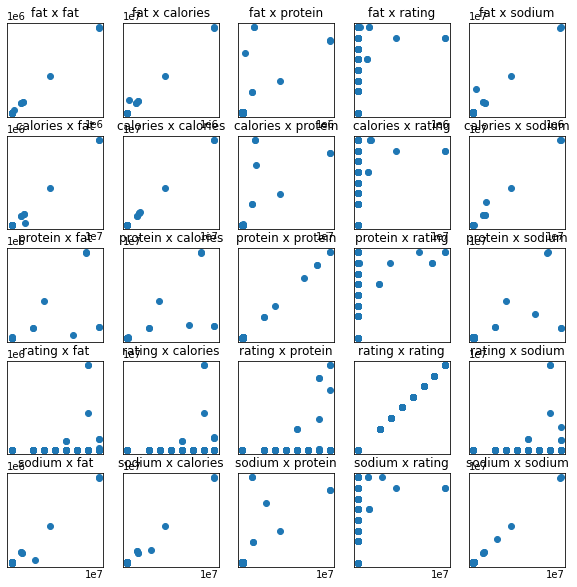

In [13]:
# Gráfico de disperção entre as variáveis

fig, axs = plt.subplots(len(float_list), len(float_list), figsize=(10,10))
for i in range(len(float_list)):
    for j in range(len(float_list)):
        axs[i,j].set_title('%s x %s'%(float_list[i],float_list[j]))
        axs[i,j].scatter(df_raw[float_list[i]],df_raw[float_list[j]])
        axs[i,j].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

Apesar de ter muitos dados apenas alguns pontos podem ser visualizados no gráfico de disperção. Possivelmente os dados extremos estão concentrados em amostras específicas.

Com a visualização de correlação das variáveis é possível como elas se relacionam entre si.

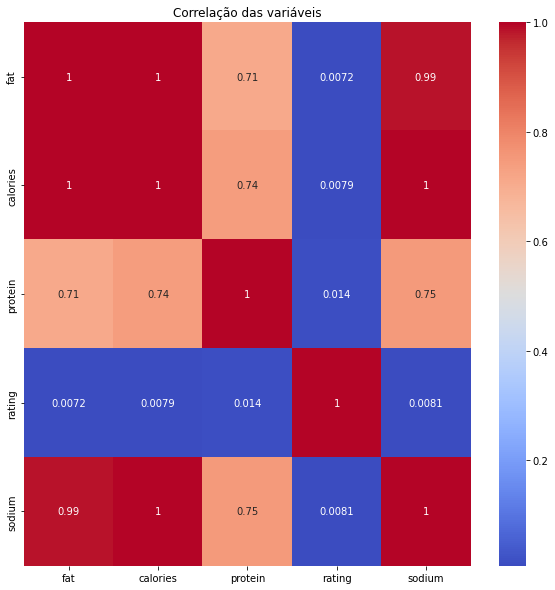

In [14]:
# Correlação das variáveis

plt.figure(figsize=(10, 10))
plt.title('Correlação das variáveis')
sns.heatmap(df_raw[float_list].corr(), annot=True, cmap='coolwarm');

Podemos perceber uma fortissima correlação entre as variáveis 'fat', 'calories' e 'sodium' e bastante forte com a 'protein' e indiferente com 'rating', o resultado possivelmente inviesado pela presença valores extremos de amostras especifícas.

In [15]:
print('Há um prato com %.1f calorias onde tem mediana da variável é de %.1f.' %(df_raw['calories'].max(),df_raw['calories'].median()))

Há um prato com 30111218.0 calorias onde tem mediana da variável é de 333.0.


In [16]:
# identificação de uma amostra com valor extremo

df_raw[df_raw['calories'] == df_raw['calories'].max()]

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
11444,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0


É importante notar que essa amostra também tem valores das variáveis 'fat', 'calories' e 'sodium' extremos.

In [17]:
# Calculo de quantidade de valores extremos da Variável 'calories' estão presentes

limite = 1e4
lim_out = df_raw[df_raw['calories'] > limite].count()[0]
lim_out_perc = (lim_out/len(df_raw))*100

print('%i das receitas tem calorias maiores que %i representando %.2f do total dos dados.' % (lim_out, limite, lim_out_perc))

21 das receitas tem calorias maiores que 10000 representando 0.13 do total dos dados.


Será excluidos as amostras maiores da Variável 'calories' que o valor limite 

In [18]:
# Retirada das amostras 
df = df_raw[df_raw['calories'] < limite]

Voltando a analisar como as variáveis estão distribuidas com o Boxplot

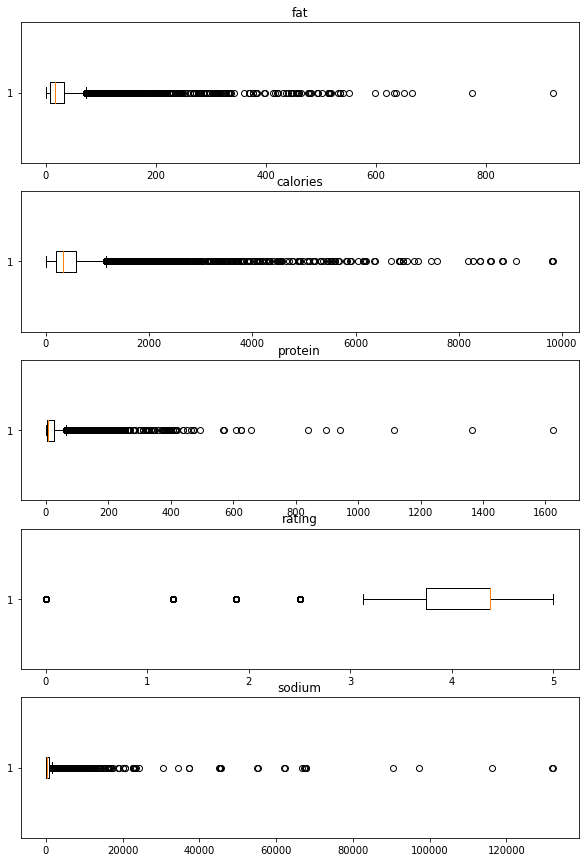

In [19]:
# boxplot das vairáveis

fig, axs = plt.subplots(len(float_list), figsize=(10,15))
for i in range(len(float_list)):
    axs[i].set_title('%s'%(float_list[i]))
    axs[i].boxplot(df[float_list[i]], vert=False)

apenas excluido amostras com valores extremos na Variável 'calories' foi possível eliminar valores extremos de todas as outras variáveis. Varias variáveis começam a apresentar comportamentos menos extremos. A Variável 'sodium' ainda aprensenta valores acima e merece uma reavaliação.

In [20]:
print('o prato com %.1f sodium onde tem mediana da variável é de %.1f' %(df['sodium'].max(),df['sodium'].median()))

o prato com 132220.0 sodium onde tem mediana da variável é de 295.0


In [21]:
# Calculo de quantidade de valores extremos da Variável 'calories' estão presentes

limite = 1e4
lim_out = df[df['sodium'] > limite].count()[0]
lim_out_perc = (lim_out/len(df))*100

print('%i das receitas tem calorias maiores que %i representando %.2f do total dos dados.' % (lim_out, limite, lim_out_perc))

84 das receitas tem calorias maiores que 10000 representando 0.53 do total dos dados.


In [22]:
# Retirada das amostras 
df = df[df['sodium'] < limite]

Voltando a analisar como as variáveis estão distribuidas com o Boxplot

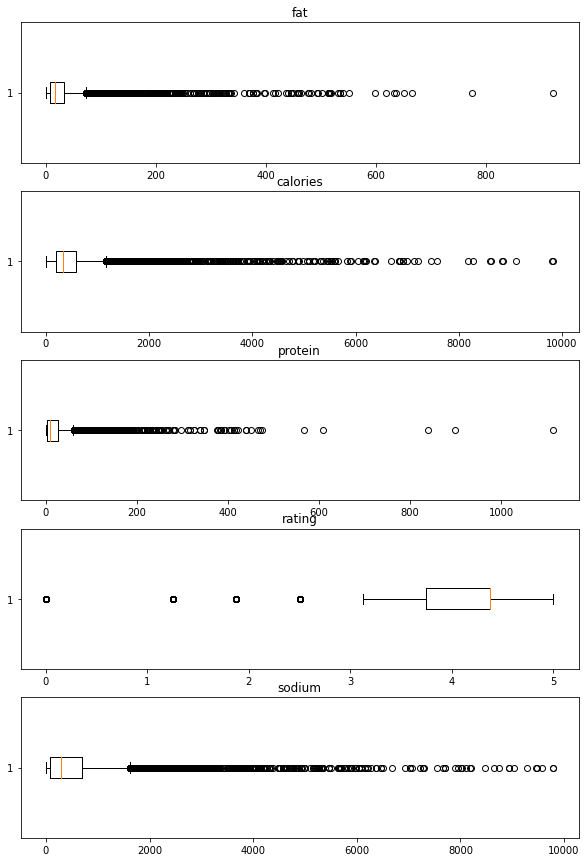

In [23]:
# boxplot das variáveis

fig, axs = plt.subplots(len(float_list), figsize=(10,15))
for i in range(len(float_list)):
    axs[i].set_title('%s'%(float_list[i]))
    axs[i].boxplot(df[float_list[i]], vert=False)

Já é possível verificar com maior precisão o comportamento das variáveis do conjunto

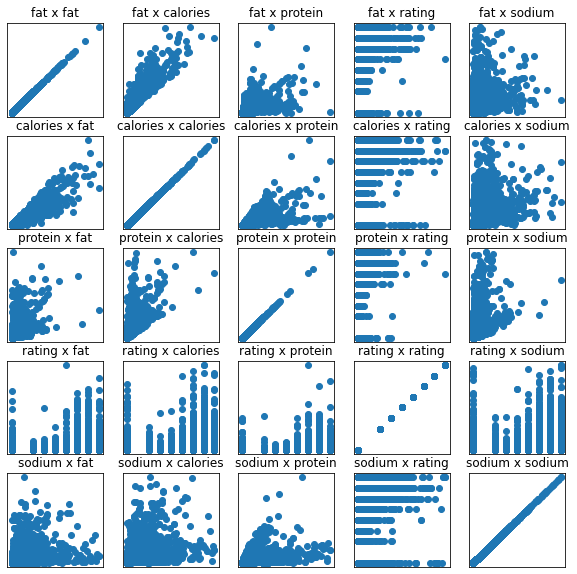

In [24]:
# gráfico de disperção 

fig, axs = plt.subplots(len(float_list), len(float_list), figsize=(10,10))
for i in range(len(float_list)):
    for j in range(len(float_list)):
        axs[i,j].set_title('%s x %s'%(float_list[i],float_list[j]))
        axs[i,j].scatter(df[float_list[i]],df[float_list[j]])
        axs[i,j].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

O gráfico de dispersão agora está bem mais significativo mostrando a relação 'fat' e 'calories' forte.

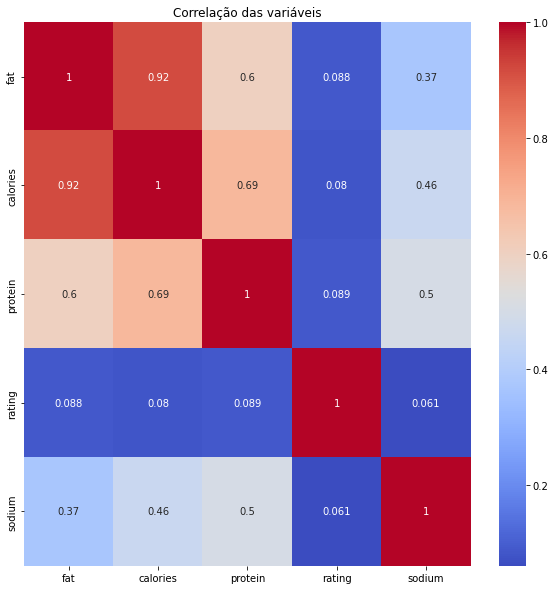

In [25]:
# correlação das variáveis

plt.figure(figsize=(10, 10))
plt.title('Correlação das variáveis')
sns.heatmap(df[float_list].corr(), annot=True, cmap='coolwarm');

O correlação das variáveis houve uma grande mudança. Ainda tem a forte correlação de 'fat' com 'calories' e com 'sodium' perdendo a grande correlação anterior.

## RESULTADOS

In [26]:
dif = len(df_raw)-len(df)
dif_perc = (dif/len(df_raw))*100


print('Foi eliminando %i o que corresponde %.1f do total de dados' %(dif,dif_perc))

Foi eliminando 105 o que corresponde 0.7 do total de dados


Apenas eliminando menos de 1% dos valores do conjunto pode obter dados com maior significancia para analise. Para melhorar esse processo pode ser estudada melhor os critérios para exclusão de amostras com entendimento das unidades de medida de cada variável. Com essas etapas concluidas é possivel também fazer analise em conjunto com as variáveis categóricas.  